## 체압데이터 시각화 

In [5]:
from IPython.display import IFrame
import math
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, cm, colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar, Bar3D, Grid, Line, Liquid, Page, Pie, Timeline, Tab, Map, Grid, Surface3D
from pyecharts import options as opts
%matplotlib inline

In [6]:
!pip install pyecharts

You should consider upgrading via the '/Users/parksunghun/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [7]:
# read csv file
rawData = pd.read_csv('./subjectTest_1_20220507.csv')
rawData2 = pd.read_csv('./subjectTest_2_20220507.csv')

In [8]:
rawData.shape

(175, 64)

In [9]:
df_values_1 = []

for i in range(175):
      selData = rawData.loc[[i], :]
      df_values_1.append(selData.values.reshape(8,8))

# print(df_values)
# print(df_values.shape)

# convertedValue = df_values.reshape(8, 8)

print(len(df_values_1))

175


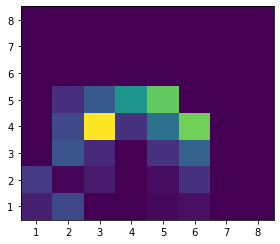

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
epoch =5

df11 = []
y0 = []
im= []

plt.rcParams["figure.figsize"] = [4.00, 3.50]
plt.rcParams["figure.autolayout"] = True

for i in range(len(df_values_1)):
      # df11 = df_values_1[i].to_numpy()
      y0 = df_values_1[i].astype('uint8')
      im0 = Image.fromarray(y0)
      
      side = np.linspace(1, 8, 8)
      X, Y = np.meshgrid(side, side)
      Z = y0

      plt.pcolormesh(X, Y, Z, shading='auto')
      #plt.pcolormesh(result)
      #plt.colorbar()
      #plt.gca().invert_xaxis() # x축 반전
      plt.savefig('/Users/parksunghun/downloads/image1/{:04d}.png'
                    .format(i))
      # plt.show()



In [1]:
import imageio
import glob

anim_file = '/Users/parksunghun/Downloads/gif/good5.gif'
with imageio.get_writer(anim_file, mode = 'I' ) as writer:
    filenames = glob.glob('/Users/parksunghun/Downloads/image1/*.png')
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 50*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/Users/parksunghun/downloads/good.gif


ls: /Users/parksunghun/Users/parksunghun/downloads/good.gif: No such file or directory


In [13]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [14]:
df_values

NameError: name 'df_values' is not defined

In [49]:
# pyecharts를 위해서 행렬반전이 필요 
# colormesh()에서는 그냥 convertedValue를 사용, 그래프 축 자체를 반전
result = np.fliplr(convertedValue)
print(convertedValue)

tmpVal = result.reshape(1,64)

[[ 21.   0.   0.   0.   0.   0.   0.   0.]
 [ 30.   0.   0.  18.  22.  17.   0.   0.]
 [ 32.  31.   0.   0.  33.  24.   0.   0.]
 [ 36.  39.  38.  33.  28.  27.   0.   0.]
 [ 19.   0.  45.  44. 127.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


In [4]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams["figure.figsize"] = [4.00, 3.50]
plt.rcParams["figure.autolayout"] = True

side = np.linspace(1, 8, 8)
X, Y = np.meshgrid(side, side)
Z = convertedValue

plt.pcolormesh(X, Y, Z, shading='auto')
#plt.pcolormesh(result)
# plt.gca().invert_xaxis() # x축 반전
plt.colorbar()
plt.show()

NameError: name 'convertedValue' is not defined

In [53]:
X, Y = np.meshgrid(np.arange(1,9,1), np.arange(1,9,1))
data_1 = [[x,y,z] for x,y,z in zip(X.reshape((-1)).tolist(), Y.reshape((-1)).tolist(), tmpVal.reshape((-1)).tolist())]

#_data = list(create_surface3d_data())

surface3d = Surface3D(init_opts=opts.InitOpts(height="600px", 
                                              width="800px"))
surface3d.add(
    series_name="체압분포 데이터",
    shading="color",
    data=data_1,
    xaxis3d_opts=opts.Axis3DOpts(type_="value"),
    yaxis3d_opts=opts.Axis3DOpts(type_="value"),
    grid3d_opts=opts.Grid3DOpts(width=130, height=40, depth=130),)

surface3d.set_global_opts(title_opts=opts.TitleOpts(title="Scatter-VisualMap(Color)"),
                          visualmap_opts=opts.VisualMapOpts(dimension=2,
                                                            max_=300,
                                                            min_=0,
                                                            range_color=["#313695",
                                                                         "#4575b4",
                                                                         "#74add1",
                                                                         "#abd9e9",
                                                                         "#e0f3f8",
                                                                         "#ffffbf",
                                                                         "#fee090",
                                                                         "#fdae61",
                                                                         "#f46d43",
                                                                         "#d73027",
                                                                         "#a50026"],
                                                           )
                         )

surface3d.render_notebook()

In [54]:
X, Y = np.meshgrid(np.arange(1,9,1), np.arange(1,9,1))
data_1 = [[x,y,z] for x,y,z in zip(X.reshape((-1)).tolist(), Y.reshape((-1)).tolist(), tmpVal.reshape((-1)).tolist())]

#_data = list(create_surface3d_data())

bar3d = Bar3D(init_opts=opts.InitOpts(height="600px", 
                                              width="800px"))
bar3d.add(
    series_name="체압분포 데이터",
    shading="color",
    data=data_1,
    xaxis3d_opts=opts.Axis3DOpts(type_="value"),
    yaxis3d_opts=opts.Axis3DOpts(type_="value"),
    grid3d_opts=opts.Grid3DOpts(width=100, height=50, depth=100),)

bar3d.set_global_opts(title_opts=opts.TitleOpts(title="Scatter-VisualMap(Color)"),
                          visualmap_opts=opts.VisualMapOpts(dimension=2,
                                                            max_=256,
                                                            min_=0,
                                                            range_color=["#313695",
                                                                         "#4575b4",
                                                                         "#74add1",
                                                                         "#abd9e9",
                                                                         "#e0f3f8",
                                                                         "#ffffbf",
                                                                         "#fee090",
                                                                         "#fdae61",
                                                                         "#f46d43",
                                                                         "#d73027",
                                                                         "#a50026"],
                                                           )
                         )
bar3d.render_notebook()

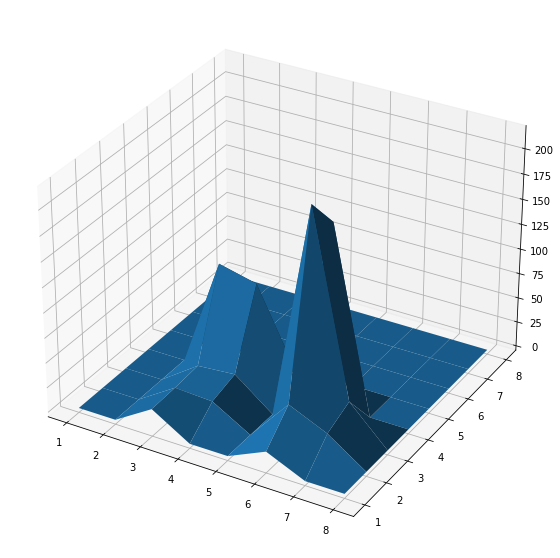

In [651]:
x = [1, 2, 3, 4, 5, 6, 7, 8] # np.arange(1, 6, 1)
y = [1, 2, 3, 4, 5, 6, 7, 8] #np.arange(1, 6, 1)
X,Y = np.meshgrid(x,y)
Z = result

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# Plot a 3D surface
ax.plot_surface(X, Y, Z)

plt.show()

In [158]:
surface3d.get_options()

{'animation': True,
 'animationThreshold': 2000,
 'animationDuration': 1000,
 'animationEasing': 'cubicOut',
 'animationDelay': 0,
 'animationDurationUpdate': 300,
 'animationEasingUpdate': 'cubicOut',
 'animationDelayUpdate': 0,
 'color': ['#c23531',
  '#2f4554',
  '#61a0a8',
  '#d48265',
  '#749f83',
  '#ca8622',
  '#bda29a',
  '#6e7074',
  '#546570',
  '#c4ccd3',
  '#f05b72',
  '#ef5b9c',
  '#f47920',
  '#905a3d',
  '#fab27b',
  '#2a5caa',
  '#444693',
  '#726930',
  '#b2d235',
  '#6d8346',
  '#ac6767',
  '#1d953f',
  '#6950a1',
  '#918597'],
 'series': [{'type': 'surface',
   'name': '체압분포 데이터',
   'data': [[1, 1, 0.0],
    [2, 1, 0.0],
    [3, 1, 6.0],
    [4, 1, 6.0],
    [5, 1, 5.0],
    [6, 1, 0.0],
    [1, 2, 5.0],
    [2, 2, 0.0],
    [3, 2, 23.0],
    [4, 2, 36.0],
    [5, 2, 32.0],
    [6, 2, 16.0],
    [1, 3, 3.0],
    [2, 3, 5.0],
    [3, 3, 5.0],
    [4, 3, 19.0],
    [5, 3, 20.0],
    [6, 3, 12.0],
    [1, 4, 0.0],
    [2, 4, 8.0],
    [3, 4, 4.0],
    [4, 4, 0.0],
    

In [356]:
X, Y = np.meshgrid(np.arange(0,6,1), np.arange(0,6,1))
[[x,y,z] for x,y,z in zip(X, Y, tmpVal.reshape((-1)))]

[[array([0, 1, 2, 3, 4, 5]), array([0, 0, 0, 0, 0, 0]), 351],
 [array([0, 1, 2, 3, 4, 5]), array([1, 1, 1, 1, 1, 1]), 200],
 [array([0, 1, 2, 3, 4, 5]), array([2, 2, 2, 2, 2, 2]), 0],
 [array([0, 1, 2, 3, 4, 5]), array([3, 3, 3, 3, 3, 3]), 0],
 [array([0, 1, 2, 3, 4, 5]), array([4, 4, 4, 4, 4, 4]), 0],
 [array([0, 1, 2, 3, 4, 5]), array([5, 5, 5, 5, 5, 5]), 0]]

In [602]:
def fib(n):
    if n<=1:
        return n
    else:
        return fib(n-1) + fib(n-2)

In [604]:
fib(20)

6765

In [613]:
def printStar(n):
    if n>0:
     print('★'* n)
     printStar(n-1)

In [614]:
printStar(5)

★★★★★
★★★★
★★★
★★
★


In [630]:
import random

def arySum(arr, n):
    if n<=0:
        return arr[0]
    return arySum(arr, n-1) + arr[n]

ary = [random.randint(1, 1000) for _ in range(random.randint(10,20))]
print(ary)
print('배열합계 -->', arySum(ary, len(ary)-1))

[398, 150, 975, 781, 368, 459, 532, 289, 221, 927, 140, 489, 566, 488, 943, 90]
배열합계 --> 7816


In [628]:
def fibo(n):
    if n==0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibo(n-1) + fib(n-2)
    
print('피보나치 수 --> 0 1', end=' ')
for i in range(2, 25):
    print(fibo(i), end=' ')

피보나치 수 --> 0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 